In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#get data to work with

df=pd.read_csv("BMI1.csv")
df.head()

,Height M,Weight kg,BMI,Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5


In [4]:
cdf=df[["Height M", "Weight kg", "BMI", "Fat"]]
cdf.head(6)

,Height M,Weight kg,BMI,Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5
5,1.60655,52.616718,20.386152,22.1


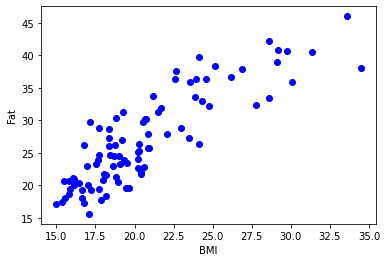

In [38]:
plt.scatter(cdf.BMI, cdf.Fat, color ="blue")
plt.xlabel("BMI")
plt.ylabel("Fat")
plt.show()

In [5]:
#train data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

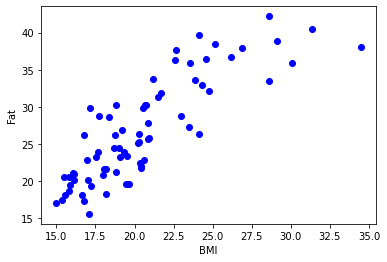

In [6]:
plt.scatter(train.BMI, train.Fat, color="blue")
plt.xlabel("BMI")
plt.ylabel("Fat")
plt.show()

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['BMI']])
train_y = np.asanyarray(train[['Fat']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.40226581]]
Intercept:  [-2.01542721]


Text(0, 0.5, 'Fat')

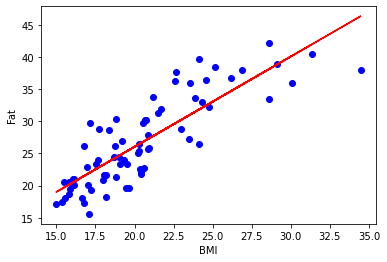

In [10]:
plt.scatter(train.BMI, train.Fat,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("BMI")
plt.ylabel("Fat")

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['BMI']])
test_y = np.asanyarray(test[['Fat']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2.70
Residual sum of squares (MSE): 10.07
R2-score: 0.84


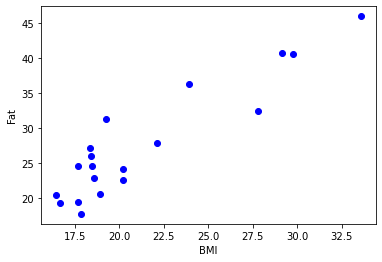

In [14]:
plt.scatter(test.BMI, test.Fat, color="blue")
plt.xlabel("BMI")
plt.ylabel("Fat")
plt.show()